In [28]:
import sys
sys.path.append("../../")

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
from coffea.util import load
import numpy as np
import pandas as pd
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

from pprint import pprint 
hep.style.use(hep.style.ROOT)

import hist

In [13]:
file = "../output/parton_matching_dR03_v57/output.coffea"
out = load(file)
out.keys()

dict_keys(['sum_genweights', 'sumw', 'cutflow', 'seed_chunk', 'variables', 'columns', 'processing_metadata', 'scale_genweight'])

In [14]:
out["variables"].keys()

dict_keys(['JetGood_eta', 'JetGood_pt', 'JetGood_phi', 'JetGood_btagDeepFlavB', 'BJetGood_eta', 'BJetGood_pt', 'BJetGood_phi', 'BJetGood_btagDeepFlavB', 'ElectronGood_eta', 'ElectronGood_pt', 'ElectronGood_phi', 'ElectronGood_etaSC', 'MuonGood_eta', 'MuonGood_pt', 'MuonGood_phi', 'nJets', 'nBJets', 'JetGood_eta_1', 'JetGood_pt_1', 'JetGood_phi_1', 'JetGood_btagDeepFlavB_1', 'JetGood_eta_2', 'JetGood_pt_2', 'JetGood_phi_2', 'JetGood_btagDeepFlavB_2', 'JetGood_eta_3', 'JetGood_pt_3', 'JetGood_phi_3', 'JetGood_btagDeepFlavB_3', 'JetGood_eta_4', 'JetGood_pt_4', 'JetGood_phi_4', 'JetGood_btagDeepFlavB_4', 'JetGood_eta_5', 'JetGood_pt_5', 'JetGood_phi_5', 'JetGood_btagDeepFlavB_5', 'bjet_eta_1', 'bjet_pt_1', 'bjet_phi_1', 'bjet_btagDeepFlavB_1', 'bjet_eta_2', 'bjet_pt_2', 'bjet_phi_2', 'bjet_btagDeepFlavB_2', 'bjet_eta_3', 'bjet_pt_3', 'bjet_phi_3', 'bjet_btagDeepFlavB_3', 'bjet_eta_4', 'bjet_pt_4', 'bjet_phi_4', 'bjet_btagDeepFlavB_4', 'bjet_eta_5', 'bjet_pt_5', 'bjet_phi_5', 'bjet_btagDeep

In [15]:
q = out["columns"]["4j"]["parton_prov"]["ttHTobb"].value

In [16]:
out["columns"]["4j"]["npartons_tot"]["ttHTobb"].value[0:100]

array([7, 7, 7, 7, 7, 7, 5, 7, 5, 7, 7, 5, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7,
       5, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 5, 7, 7, 5, 5, 7, 7, 7, 7, 5,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 7, 7, 7, 7, 7, 5,
       5, 7, 7, 7, 5, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 7, 5, 7, 5,
       7, 7, 7, 5, 7, 7, 5, 7, 5, 7, 7, 5])

In [17]:
q

array([ 4,  2,  3, ...,  1,  1, -1])

In [18]:
q[0:100]

array([ 4,  2,  3,  2,  2,  1,  1,  4,  3,  2,  2,  2,  1,  1,  4,  2,  3,
        2,  2,  1,  1,  4,  2,  3,  2,  2,  1,  1,  4,  2,  3,  2,  2,  1,
        1,  4,  2,  3,  2,  2,  1,  1,  2,  3,  1,  1, -1,  4,  3,  2,  2,
        2,  1,  1,  2,  3,  1,  1, -1,  4,  3,  2,  2,  2,  1,  1,  4,  2,
        3,  2,  2,  1,  1,  2,  3,  1,  1, -1,  4,  2,  3,  2,  2,  1,  1,
        2,  3,  1,  1, -1,  4,  2,  3,  2,  2,  1,  1,  4,  2,  3])

In [19]:
out["columns"]["4j"]["jet_pt_size"]["ttHTobb"].value[0:100]

array([4, 5, 5, 6, 4, 6, 4, 5, 5, 6, 8, 4, 8, 6, 7, 9, 5, 4, 8, 5, 5, 6,
       4, 8, 5, 6, 5, 7, 5, 8, 6, 6, 6, 7, 4, 5, 7, 4, 4, 9, 6, 8, 6, 4,
       4, 5, 5, 7, 5, 6, 7, 9, 5, 7, 5, 5, 4, 5, 6, 7, 6, 8, 5, 7, 8, 4,
       4, 5, 6, 5, 7, 7, 6, 7, 5, 7, 5, 7, 4, 6, 5, 5, 5, 9, 5, 5, 8, 5,
       7, 5, 7, 4, 7, 5, 6, 5, 6, 5, 7, 9])

In [20]:
out["columns"]["4j"]["parton_pdgId"]["ttHTobb"].value[0:100]

array([21,  5, -5, -3,  4,  5, -5, 21,  5, -5,  3, -4,  5, -5, 21,  5, -5,
       -3,  4,  5, -5, 21,  5, -5, -3,  4,  5, -5,  2,  5, -5, -1,  2,  5,
       -5,  1,  5, -5, -3,  4,  5, -5, 21,  5, -5,  5, -5, 21,  5, -5,  1,
       -2,  5, -5, 21,  5, -5,  5, -5, 21,  5, -5,  3, -4,  5, -5, 21,  5,
       -5, -1,  2,  5, -5, 21,  5, -5,  5, -5, 21,  5, -5, -3,  4,  5, -5,
       21,  5, -5,  5, -5, 21,  5, -5, -1,  2,  5, -5, 21,  5, -5],
      dtype=int32)

(array([4.4092e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.00000000e+00,  9.43472578e+12,  1.88694516e+13,  2.83041774e+13,
         3.77389031e+13,  4.71736289e+13,  5.66083547e+13,  6.60430805e+13,
         7.54778063e+13,  8.49125321e+13,  9.43472578e+13]),
 <BarContainer object of 10 artists>)

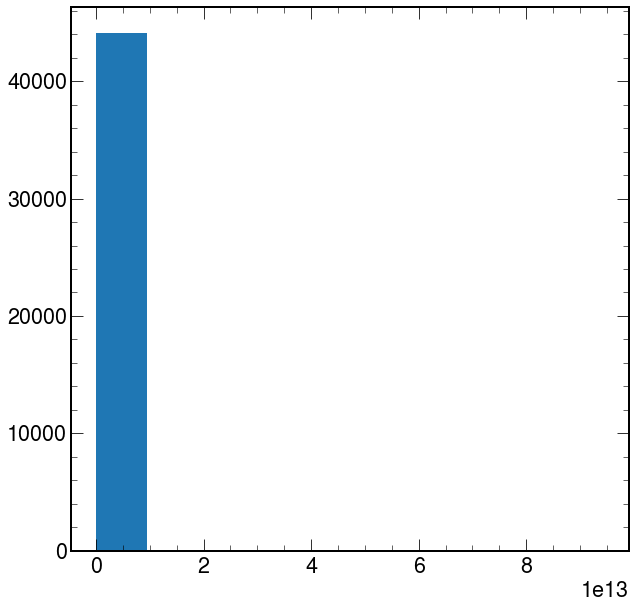

In [93]:
plt.hist(out["columns"]["4j"]["parton_prov"]["ttHTobb"].value.filled(-1))

In [83]:
partopt = np.ma.filled(out["columns"]["4j"]["parton_pt"]["ttHTobb"].value, -1)

KeyError: 'ttHTobb'

In [16]:
out["variables"]["hist_ptComparison_parton_matching"]["ttHTobb"]

Hist(
  StrCategory(['4j', '5j', '6j', '7j', '8j'], name='cat', label='Category'),
  StrCategory(['nominal'], name='variation', label='Variation'),
  StrCategory(['2018'], name='metadata.year', label='year'),
  Regular(40, 0, 300, name='JetGoodMatched.pt', label='Jet Pt'),
  Regular(40, 0, 300, name='PartonMatched.pt', label='Parton Pt'),
  Regular(5, -2.4, 2.4, name='JetGoodMatched.eta', label='Jet $\\eta$'),
  storage=Weight()) # Sum: WeightedSum(value=1.36371e+06, variance=1.36371e+06) (WeightedSum(value=1.40384e+06, variance=1.40384e+06) with flow)

In [8]:
out["columns"]["4j"]["parton_pt_size"]["ttHTobb"]

column_accumulator(array([4, 5, 5, ..., 4, 8, 5]))

In [27]:
df_sig = pd.DataFrame({k: v['ttHTobb'].value for k, v in out["columns"]['4j'].items() if "size" not in k })
df_tt = pd.DataFrame({k: v['TTToSemiLeptonic'].value for k, v in out["columns"]['4j'].items() if "size" not in k})

In [28]:
df_sig

,parton_pt,parton_pdgId,jet_pt,jet_eta,parton_jet_dR,jet_btag
0,1.894297e+02,5,1.842500e+02,4.700317e-01,2.967202e-02,9.980469e-01
1,2.084688e+02,-5,1.622500e+02,-1.172607e+00,2.786260e-02,6.772461e-01
2,6.416016e+01,4,1.345000e+02,6.423950e-02,1.015785e-01,4.785156e-01
3,1.320000e+02,5,1.308750e+02,-1.016113e+00,1.124108e-02,9.941406e-01
4,1.148438e+02,-4,1.165000e+02,-1.020813e-01,8.337682e-02,1.243591e-02
...,...,...,...,...,...,...
572229,2.142188e+02,-5,2.068750e+02,3.108521e-01,1.409740e-02,9.995117e-01
572230,8.459375e+01,5,7.656250e+01,4.522095e-01,2.146248e-02,6.473541e-03
572231,1.385071e-40,98842,3.055323e-39,-1.729236e+26,8.603066e-319,3.055323e-39
572232,0.000000e+00,0,0.000000e+00,3.089863e-41,2.261240e-319,0.000000e+00


Text(0.1, 0.9, 'TTToSemiLeptonic')

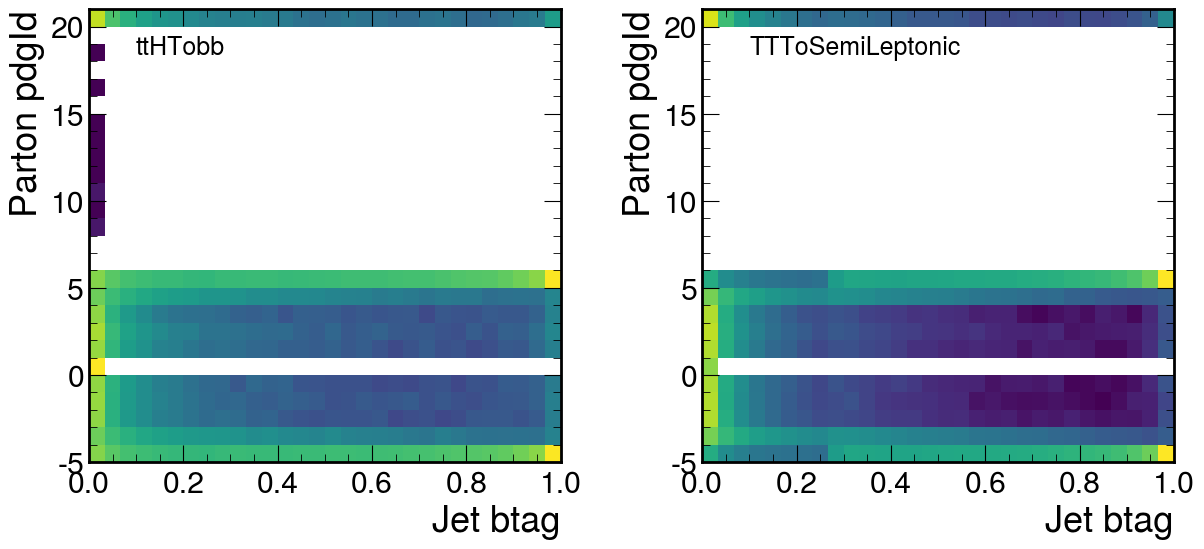

In [31]:
fig,( ax,ay) = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
plt.subplots_adjust(wspace=0.3)

ax.hist2d(df_sig.jet_btag, df_sig.parton_pdgId, bins=(30,26), range=((0,1),(-5,21)), norm=LogNorm())
ax.set_xlabel("Jet btag")
ax.set_ylabel("Parton pdgId")

ay.hist2d(df_tt.jet_btag, df_tt.parton_pdgId, bins=(30,26), range=((0,1),(-5,21)), norm=LogNorm())
ay.set_xlabel("Jet btag")
ay.set_ylabel("Parton pdgId")

ax.text(0.1, 0.9, "ttHTobb", transform=ax.transAxes, fontsize=18)
ay.text(0.1, 0.9, "TTToSemiLeptonic", transform=ay.transAxes, fontsize=18)

# Understanding the origin of each parton

In [107]:
filename = "/pnfs/psi.ch/cms/trivcat/store/user/mmarcheg/ttHbb/store/mc/RunIISummer20UL18NanoAODv9/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/2500000/6BF93845-49D5-2547-B860-4F7601074715.root"
#filename = "/pnfs/psi.ch/cms/trivcat/store/user/mmarcheg/ttHbb/store/mc/RunIISummer20UL18NanoAODv9/TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/130000/44187D37-0301-3942-A6F7-C723E9F4813D.root"
#events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema).events()
events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema, entry_stop=200000).events()

## Check partons inclusively

In [108]:
isOutgoing = events.LHEPart.status == 1
noHiggs = events.LHEPart.pdgId != 25
part = events.LHEPart[isOutgoing & noHiggs]

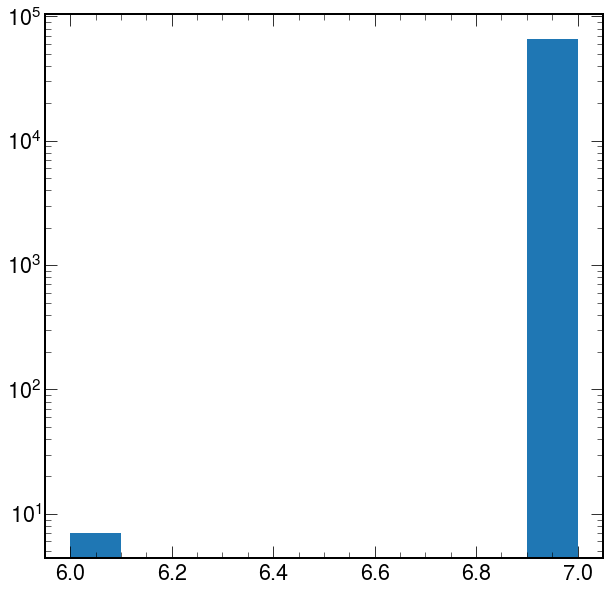

In [109]:
plt.hist(ak.num(part))
plt.yscale("log")

In [110]:
part.pdgId[0:10].tolist()

[[21, 5, -5, -13, 14, 3, -4],
 [21, 5, -5, -3, 4, 3, -2],
 [21, 5, -5, -15, 16, 3, -4],
 [21, 5, -5, -3, 4, 11, -12],
 [2, 5, -5, -3, 4, 3, -4],
 [2, 5, -5, -15, 16, 15, -16],
 [21, 5, -5, -1, 2, 13, -14],
 [21, 5, -5, -3, 4, 1, -2],
 [21, 5, -5, -3, 4, 1, -2],
 [21, 5, -5, -1, 2, 1, -2]]

In [111]:
isParton = (abs(part.pdgId) < 6) | (part.pdgId == 21) 

partq = part[isParton]

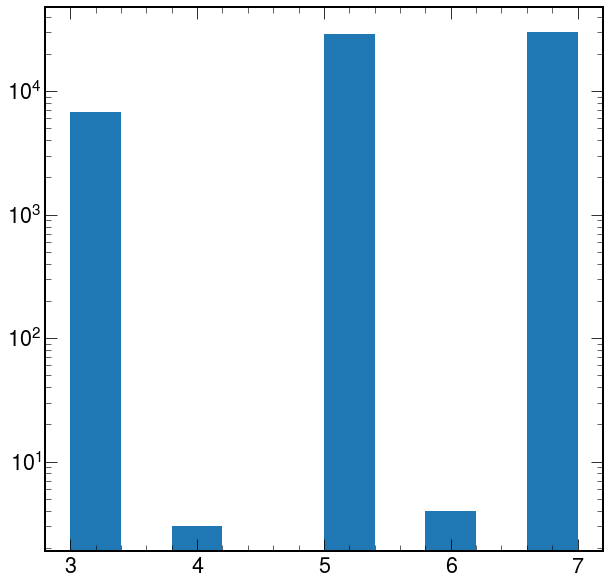

In [112]:
plt.hist(ak.num(partq))
plt.yscale("log")

So this is fully hadronic (7,6), semileptonic (5,4) and fully leptonic (3)

### Semileptonic reco selection

In [40]:
from PocketCoffea.lib.leptons import lepton_selection
from PocketCoffea.parameters.object_preselection import object_preselection

In [113]:
electron_etaSC = events.Electron.eta + events.Electron.deltaEtaSC
events["Electron"] = ak.with_field(events.Electron, electron_etaSC, "etaSC")
events["ElectronGood"] = lepton_selection(events, "Electron", "semileptonic")
events["MuonGood"]     = lepton_selection(events, "Muon", "semileptonic")
leptons = ak.with_name( ak.concatenate( (events.MuonGood,events.ElectronGood), axis=1 ), name='PtEtaPhiMCandidate' )
events["LeptonGood"]   = leptons[ak.argsort(leptons.pt, ascending=False)]

Investigate the signal categories in the LHE

(array([30142.,     0.,     0.,     0.,     0., 29038.,     0.,     0.,
            0.,  6820.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

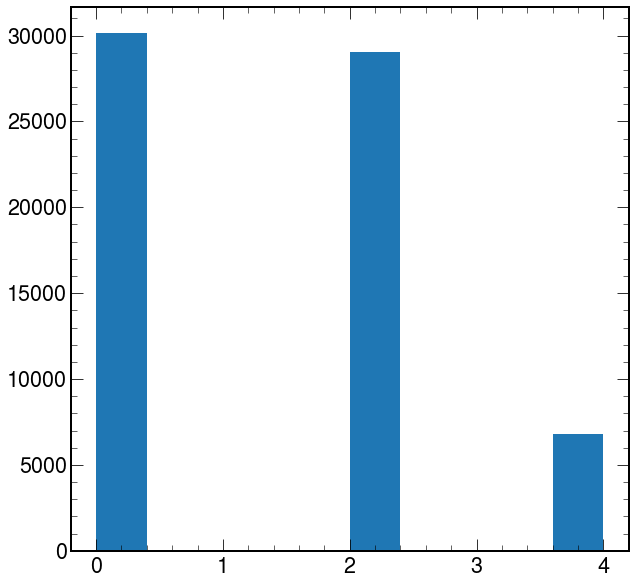

In [121]:
plt.hist(ak.sum( (abs(events.LHEPart.pdgId) >=11)&(abs(events.LHEPart.pdgId) <19), axis=1))

In [127]:
semilep_lhe = (ak.sum( (abs(events.LHEPart.pdgId) >=11)&(abs(events.LHEPart.pdgId) <19), axis=1)==2)
dilep_lhe = (ak.sum( (abs(events.LHEPart.pdgId) >=11)&(abs(events.LHEPart.pdgId) <19), axis=1)==4)
had_lhe = (ak.sum( (abs(events.LHEPart.pdgId) >=11)&(abs(events.LHEPart.pdgId) <19), axis=1)==0)

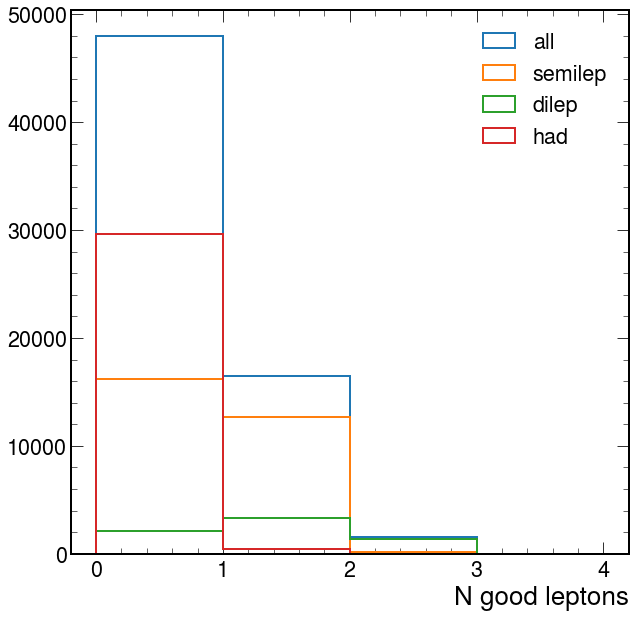

In [134]:
plt.hist(ak.num(events.LeptonGood), histtype="step", linewidth=2, label="all", bins=4, range=(0, 4))
plt.hist(ak.num(events.LeptonGood[semilep_lhe]), histtype="step", linewidth=2, label="semilep", bins=4, range=(0, 4))
plt.hist(ak.num(events.LeptonGood[dilep_lhe]), histtype="step", linewidth=2, label="dilep", bins=4, range=(0, 4))
plt.hist(ak.num(events.LeptonGood[had_lhe]), histtype="step", linewidth=2, label="had", bins=4, range=(0, 4))
#plt.yscale("log")
plt.legend()
plt.xlabel("N good leptons")
plt.savefig("plots/number_good_lepton_lhe_cat.pdf")
plt.savefig("plots/number_good_lepton_lhe_cat.png")

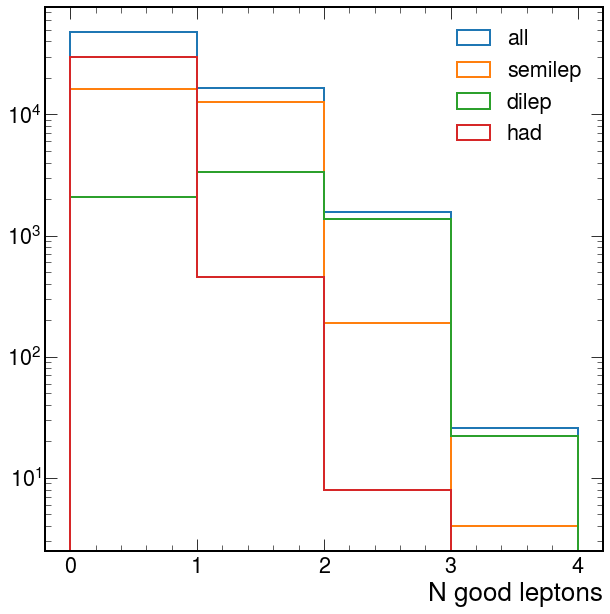

In [135]:
plt.hist(ak.num(events.LeptonGood), histtype="step", linewidth=2, label="all", bins=4, range=(0, 4))
plt.hist(ak.num(events.LeptonGood[semilep_lhe]), histtype="step", linewidth=2, label="semilep", bins=4, range=(0, 4))
plt.hist(ak.num(events.LeptonGood[dilep_lhe]), histtype="step", linewidth=2, label="dilep", bins=4, range=(0, 4))
plt.hist(ak.num(events.LeptonGood[had_lhe]), histtype="step", linewidth=2, label="had", bins=4, range=(0, 4))
plt.yscale("log")
plt.legend()
plt.xlabel("N good leptons")
plt.savefig("plots/number_good_lepton_lhe_cat_log.pdf")
plt.savefig("plots/number_good_lepton_lhe_cat_log.png")

In [141]:
events["nMuonGood"]     = ak.num(events.MuonGood)
events["nElectronGood"] = ak.num(events.ElectronGood)
events["nLepGood"]      = events["nMuonGood"] + events["nElectronGood"]

In [144]:
has_one_electron = (events.nElectronGood == 1)
has_one_muon     = (events.nMuonGood == 1)

In [148]:
mask =  ((events.nLepGood == 1) &
              # Here we properly distinguish between leading muon and leading electron
             ( (has_one_electron & (ak.firsts(events.LeptonGood.pt) > 29)) |
               (has_one_muon & (ak.firsts(events.LeptonGood.pt) > 26)) ))

In [150]:
ak.num(events, axis=0)

<Record ... nLepGood: 66000} type='{"SoftActivityJetHT5": int64, "PV": int64, "C...'>

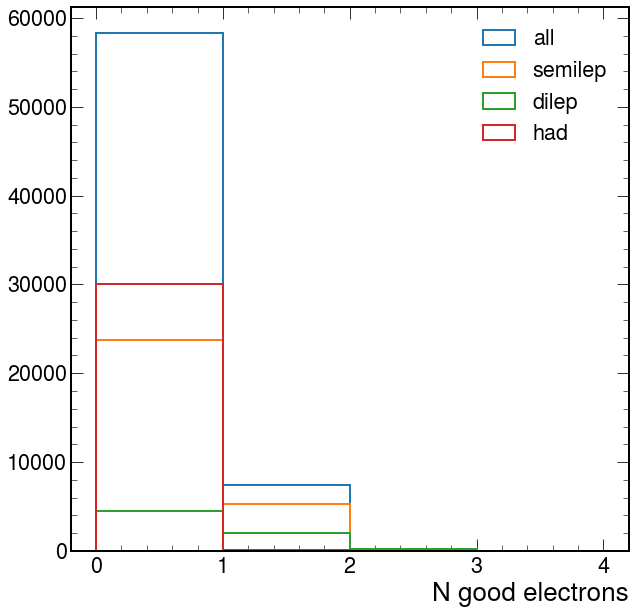

In [154]:
plt.hist(ak.num(events.ElectronGood), histtype="step", linewidth=2, label="all", bins=4, range=(0, 4))
plt.hist(ak.num(events.ElectronGood[semilep_lhe]), histtype="step", linewidth=2, label="semilep", bins=4, range=(0, 4))
plt.hist(ak.num(events.ElectronGood[dilep_lhe]), histtype="step", linewidth=2, label="dilep", bins=4, range=(0, 4))
plt.hist(ak.num(events.ElectronGood[had_lhe]), histtype="step", linewidth=2, label="had", bins=4, range=(0, 4))
#plt.yscale("log")
plt.legend()
plt.xlabel("N good electrons")
plt.savefig("plots/number_good_ele_lhe_cat.pdf")
plt.savefig("plots/number_good_ele_lhe_cat.png")

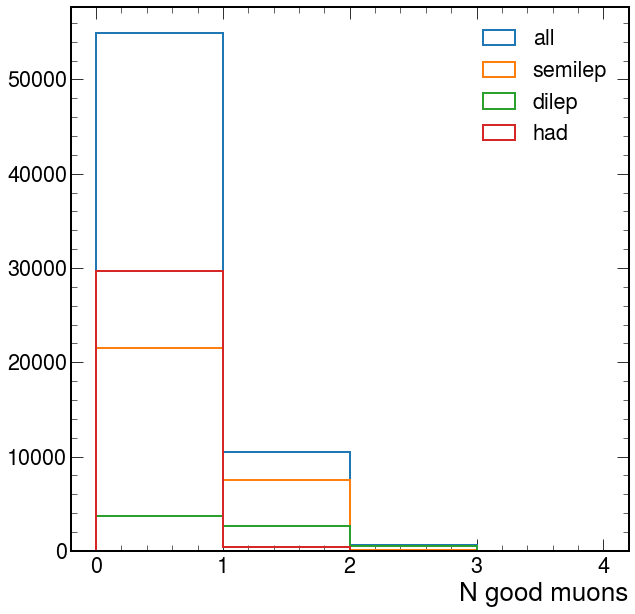

In [155]:
plt.hist(ak.num(events.MuonGood), histtype="step", linewidth=2, label="all", bins=4, range=(0, 4))
plt.hist(ak.num(events.MuonGood[semilep_lhe]), histtype="step", linewidth=2, label="semilep", bins=4, range=(0, 4))
plt.hist(ak.num(events.MuonGood[dilep_lhe]), histtype="step", linewidth=2, label="dilep", bins=4, range=(0, 4))
plt.hist(ak.num(events.MuonGood[had_lhe]), histtype="step", linewidth=2, label="had", bins=4, range=(0, 4))
#plt.yscale("log")
plt.legend()
plt.xlabel("N good muons")
plt.savefig("plots/number_good_muon_lhe_cat.pdf")
plt.savefig("plots/number_good_muon_lhe_cat.png")

In [159]:
print("Total events with 1 good lepton" , ak.sum(ak.num(events.LeptonGood)==1))
print("Total events with 1 good lepton, semilep" , ak.sum(ak.num(events.LeptonGood[semilep_lhe])==1))
print("Total events with 1 good lepton, dilep" , ak.sum(ak.num(events.LeptonGood[dilep_lhe])==1))
print("Total events with 1 good lepton, had" , ak.sum(ak.num(events.LeptonGood[had_lhe])==1))

Total events with 1 good lepton 16433
Total events with 1 good lepton, semilep 12634
Total events with 1 good lepton, dilep 3344
Total events with 1 good lepton, had 455


In [162]:
3344 / 16433

0.20349297145986733

In [ ]:
has_one_electron = (events.nElectronGood == 1)
has_one_muon     = (events.nMuonGood == 1)

mask = ( (events.nLepGood == 1) &
              # Here we properly distinguish between leading muon and leading electron
             ( (has_one_electron & (ak.firsts(events.LeptonGood.pt) > params["pt_leading_electron"][year])) |
               (has_one_muon & (ak.firsts(events.LeptonGood.pt) > params["pt_leading_muon"][year])) ) &
             (events.nJetGood >= params["njet"]) &
             (events.nBJetGood >= params["nbjet"]) &
             (MET.pt > params["met"]) )


Text(0.5, 1.0, 'Electron selection')

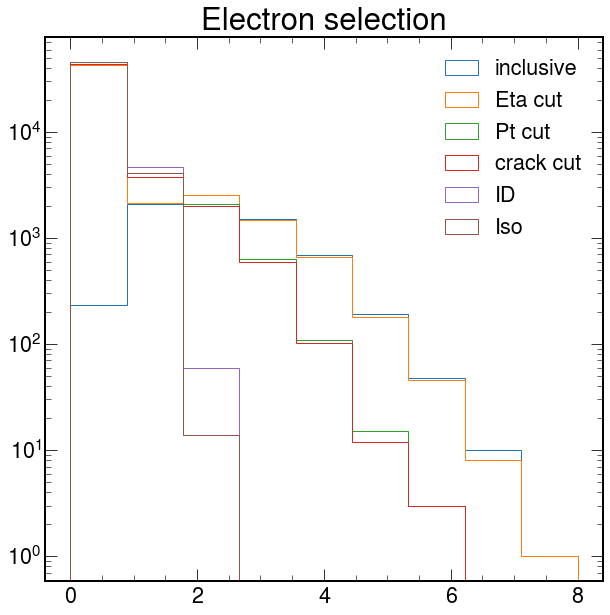

In [91]:
plt.hist(ak.num(events.Electron[ele]), range=(0,8),bins=9, histtype="step", label="inclusive")
plt.hist(ak.num(events.Electron[ele&passes_eta]), range=(0,8),bins=9, histtype="step", label="Eta cut")
plt.hist(ak.num(events.Electron[ele&passes_eta&passes_pt]), range=(0,8),bins=9, histtype="step", label="Pt cut")
plt.hist(ak.num(events.Electron[ele&passes_eta&passes_pt&passes_SC]), range=(0,8),bins=9, histtype="step", label="crack cut")
plt.hist(ak.num(events.Electron[ele&passes_eta&passes_pt&passes_SC&passes_id]), range=(0,8),bins=9, histtype="step", label="ID")
plt.hist(ak.num(events.Electron[ele&passes_eta&passes_pt&passes_SC&passes_id&passes_iso]), range=(0,8),bins=9, histtype="step", label="Iso")
#plt.hist(ak.num(events.ElectronGood), range=(0,8),bins=9, histtype="step")
plt.yscale("log")
plt.legend()
plt.title("Electron selection")

(array([44183.,     0.,     0.,     0.,     0.,  5637.,     0.,     0.,
            0.,   180.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

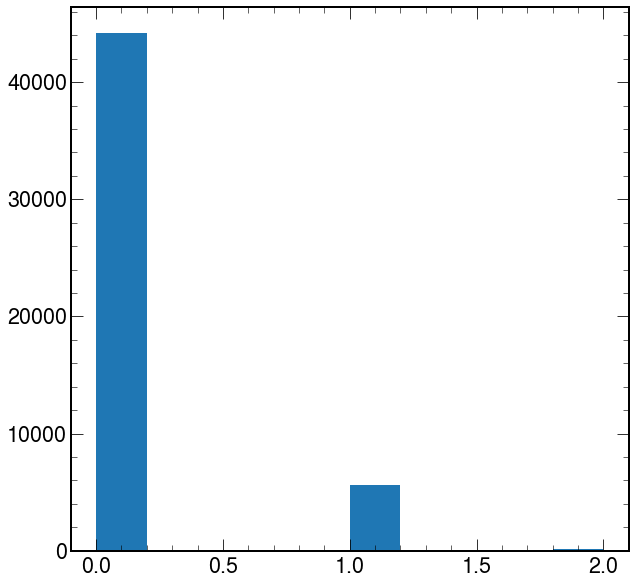

In [37]:
plt.hist(ak.num(events.ElectronGood))

In [ ]:
# Build masks for selection of muons, electrons, jets, fatjets
        self.events["MuonGood"]     = lepton_selection(self.events, "Muon", self.cfg.finalstate)
        self.events["ElectronGood"] = lepton_selection(self.events, "Electron", self.cfg.finalstate)
        leptons = ak.with_name( ak.concatenate( (self.events.MuonGood, self.events.ElectronGood), axis=1 ), name='PtEtaPhiMCandidate' )
        self.events["LeptonGood"]   = leptons[ak.argsort(leptons.pt, ascending=False)]
        self.events["JetGood"], self.jetGoodMask = jet_selection(self.events, "Jet", self.cfg.finalstate)
        self.events["BJetGood"] = btagging(self.events["JetGood"], self._btag)


## Parton matching investigation
How to match the parton with the original particle flavour

In [166]:
from PocketCoffea.lib.deltaR_matching import object_matching

In [167]:
isOutgoing = events.LHEPart.status == 1
isParton = (abs(events.LHEPart.pdgId) < 6) | \
            (events.LHEPart.pdgId == 21) 

quarks = events.LHEPart[isOutgoing & (events.LHEPart.pdgId!=25)]
        
# # Select b-quarks at Gen level, coming from H->bb decay
higgs = events.GenPart[(events.GenPart.pdgId == 25) & (events.GenPart.hasFlags(['fromHardProcess']))]
higgs =  higgs[ak.num(higgs.childrenIdxG, axis=2) == 2]
higgs_partons = ak.with_field(ak.flatten(higgs.children, axis=2), 25, "from_part")
quarks = ak.with_name(ak.concatenate( (quarks, higgs_partons) , axis=1) , name='PtEtaPhiMCandidate')
# Sort b-quarks by pt
#quarks = ak.with_name(quarks[ak.argsort(quarks.pt, ascending=False)], name='PtEtaPhiMCandidate')

semilep = ak.sum((abs(quarks.pdgId) > 10)&(quarks.pdgId < 21), axis=1)

semilep_partons = quarks[semilep==2]
events = events[semilep==2]
    # # Calling our general object_matching function.
    # # The output is an awkward array with the shape of the second argument and None where there is no matching.
    # # So, calling like this, we will get out an array of matched_quarks with the dimension of the JetGood. 
    # matched_quarks, matched_jets, deltaR_matched = object_matching(quarks, self.events.JetGood, dr_min=self.dr_min)

Request only one electron/muon --> semileptonic

In [168]:
semilep_partons.pdgId[0:10].tolist()

[[21, 5, -5, -13, 14, 3, -4, 5, -5],
 [21, 5, -5, -15, 16, 3, -4, 5, -5],
 [21, 5, -5, -3, 4, 11, -12, 5, -5],
 [21, 5, -5, -1, 2, 13, -14, 5, -5],
 [21, 5, -5, -15, 16, 3, -4, 5, -5],
 [2, 5, -5, -13, 14, 3, -4, 5, -5],
 [2, 5, -5, -13, 14, 3, -4, 5, -5],
 [21, 5, -5, -1, 2, 15, -16, 5, -5],
 [-2, 5, -5, -3, 4, 13, -14, 5, -5],
 [21, 5, -5, -3, 4, 11, -12, 5, -5]]

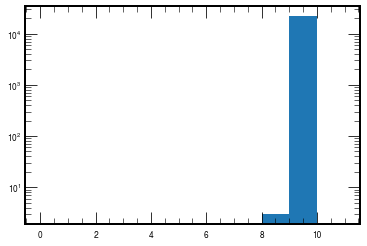

In [10]:
plt.hist(ak.num(semilep_partons), range=(0, 11), bins=11)
plt.yscale("log")

In [67]:
semilep_partons[ak.num(semilep_partons)<9].pdgId.tolist()

[[5, -5, -13, 14, 3, -4, 5, -5],
 [5, -5, -13, 14, 3, -4, 5, -5],
 [5, -5, -13, 14, 1, -2, 5, -5]]

In [12]:
semilep_partons[:,7]

<Array [GenParticle, ... GenParticle] type='21973 * union[struct[["pt", "eta", "...'>

In [14]:
top_parton1 = semilep_partons[:,1] + semilep_partons[:,3] + semilep_partons[:,4]
top_parton2 = semilep_partons[:,2] + semilep_partons[:,5] + semilep_partons[:,6]
#higgs_fromb = semilep_partons[:,7] + semilep_partons[:,8]

In [ ]:
y = ak.to_numpy(ak.flatten(semilep_partons.pdgId))
x = ak.to_numpy(ak.flatten(ak.local_index(semilep_partons.pdgId)))

plt.hist2d(x,y, cmin=1, bins=(8,37), range=((0,8),(-16,21)))
plt.xlabel("LHE position")
plt.ylabel("Pdg Id")
plt.colorbar()

Text(0, 1, 'pdgId pos 5')

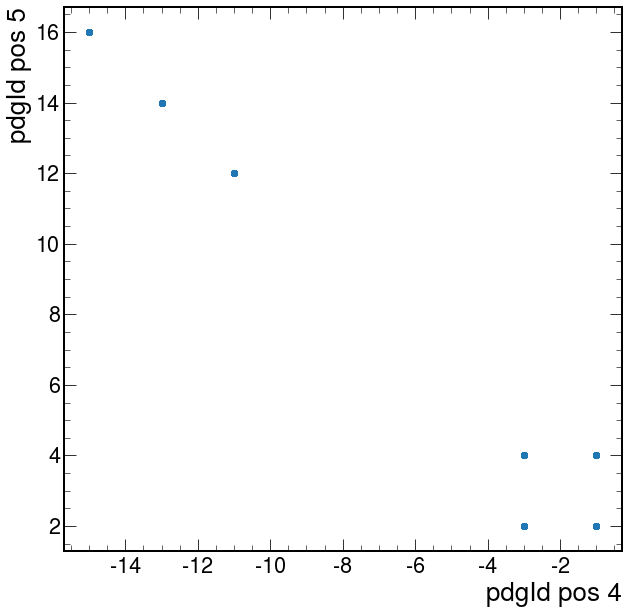

In [199]:
plt.scatter(semilep_partons.pdgId[:,3],semilep_partons.pdgId[:,4])
plt.xlabel("pdgId pos 4")
plt.ylabel("pdgId pos 5")

Text(0, 1, 'pdgId pos 6')

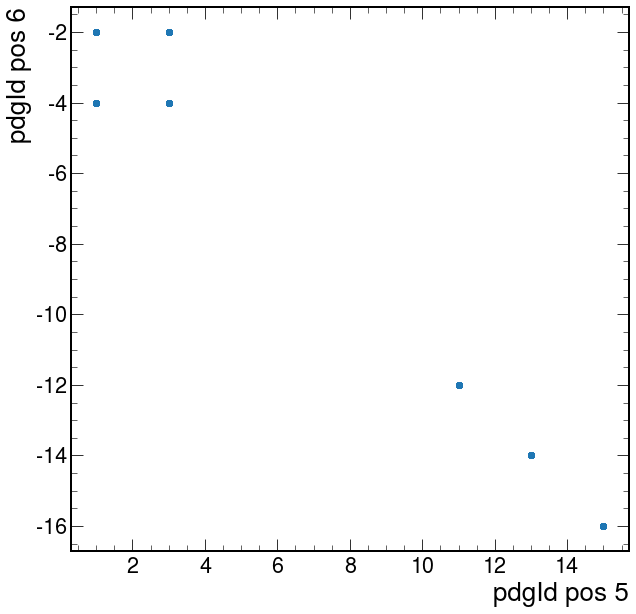

In [200]:
plt.scatter(semilep_partons.pdgId[:,5],semilep_partons.pdgId[:,6])
plt.xlabel("pdgId pos 5")
plt.ylabel("pdgId pos 6")

(array([4.700e+01, 3.700e+01, 3.900e+01, 4.900e+01, 6.100e+01, 7.700e+01,
        8.600e+01, 1.080e+02, 1.450e+02, 1.820e+02, 3.140e+02, 4.200e+02,
        7.440e+02, 1.827e+03, 5.685e+03, 7.396e+03, 2.431e+03, 9.360e+02,
        4.670e+02, 2.430e+02, 1.740e+02, 1.280e+02, 8.500e+01, 6.400e+01,
        5.300e+01, 4.200e+01, 4.000e+01, 3.900e+01, 2.100e+01, 2.100e+01,
        1.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

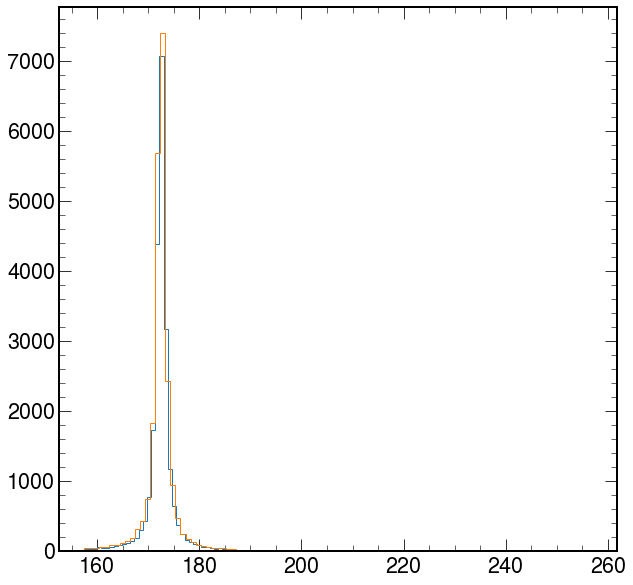

In [17]:
plt.hist(top_parton1.mass, bins=100, histtype="step")
plt.hist(top_parton2.mass, bins=100, histtype="step")
#plt.hist(higgs_fromb.mass, bins=100, histtype="step")

(array([    0.,     0.,     0.,     0.,     0.,  1106.,  1118.,  1036.,
         1076.,  1090.,  1071.,     0.,     0.,     0.,     0.,     0.,
        10025.,  3511.,  3394.,  3428.,  3544.,     0.,  3919.,  4750.,
         3560.,  3358., 10022.,     0.,     0.,     0.,     0.,     0.,
         1090.,  1071.,  1036.,  1076.,  1106.,  1118.,     0.,     0.,
            0.,  7495.]),
 array([-21., -20., -19., -18., -17., -16., -15., -14., -13., -12., -11.,
        -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.]),
 <BarContainer object of 42 artists>)

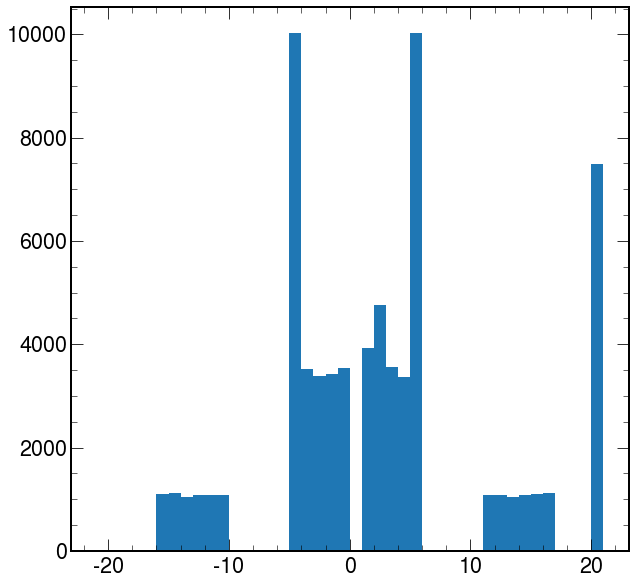

In [20]:
plt.hist(ak.flatten(events.LHEPart[events.LHEPart.status==1].pdgId), range=(-21,21), bins=42)

(array([    0.,     0.,     0.,     0.,     0., 10000.,     0.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 7 artists>)

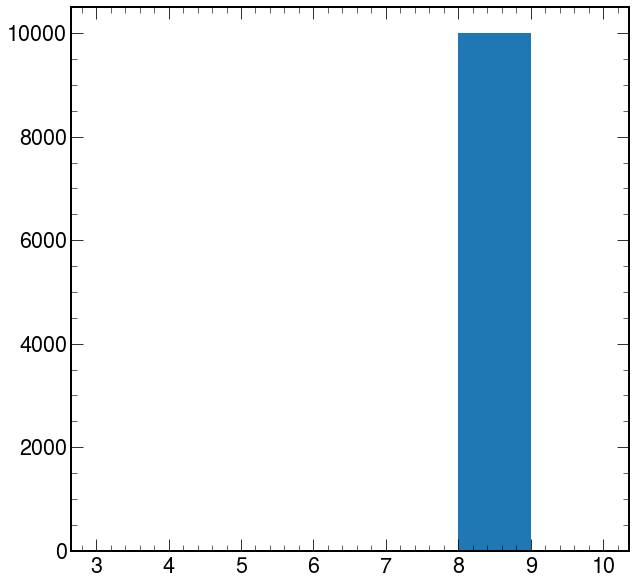

In [22]:
plt.hist(ak.num(events.LHEPart[events.LHEPart.status==1]), bins=7, range=(3, 10))

(array([1019.,    0., 4459.,    0., 4522.]),
 array([3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 5 artists>)

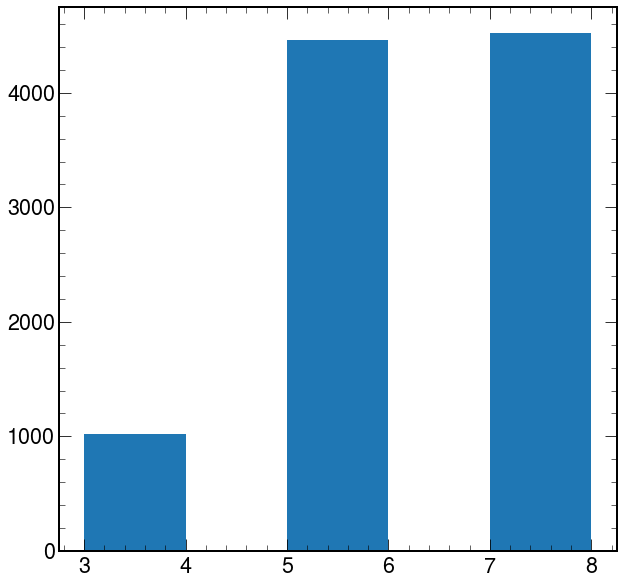

In [11]:
plt.hist(ak.num(quarks), bins=5, range=(3, 8))

(array([20000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 80000.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

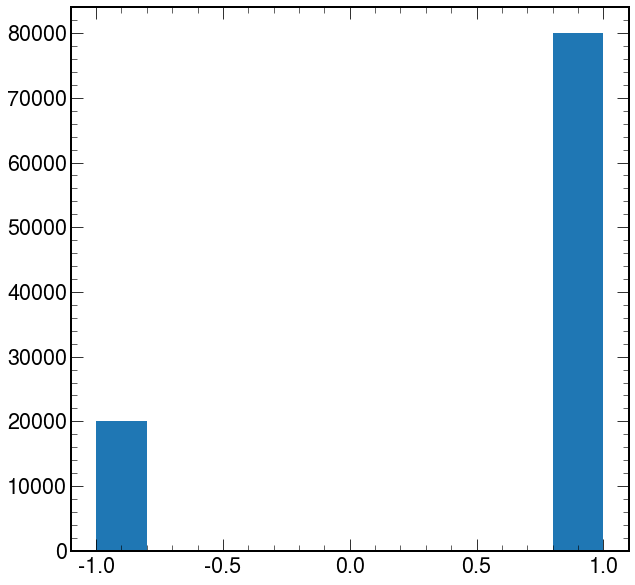

In [53]:
plt.hist(ak.flatten(events.LHEPart.status))

## Matching

In [169]:
abspdg = abs(semilep_partons.pdgId)
lepparton = (abspdg>=11)&(abspdg<=18)
pp = semilep_partons[(~lepparton)]

- 3, -4 ==> s, -c ==> -1/3  -2/3 = -1 ==> W- => antitop
- 3, -2 ==> s, -u ==> -1/3 -2/3 = -1 ==> W- ==>antitop (suppressed)
- 1, -2 ==> d, -u ==> -1/3 -2/3 = -1 ==> W- =>antitop
- 1, -4 ==> d, -c ==> -1/3, -2/3 = -1 ==> W- ==> antitop (suppressed)

- -3, 4 ==> -s, c ==> 1/3  2/3 = +1 ==> W+ => top
- -3, 2 ==> -s, u ==> 1/3 2/3 = 1 ==> W+ ==> top (suppressed)
- -1, 2 ==> -d, u ==> 1/3  +2/3 = +1 ==> W+ ==> top
- -1, 4 ==> -d, c ==> 1/3 2/3 = 1 ==> W+ ==> top (suppressed)


(array([2.1500e+02, 7.9259e+04, 2.2400e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5285e+04, 0.0000e+00,
        0.0000e+00, 1.5163e+04, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.4911e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

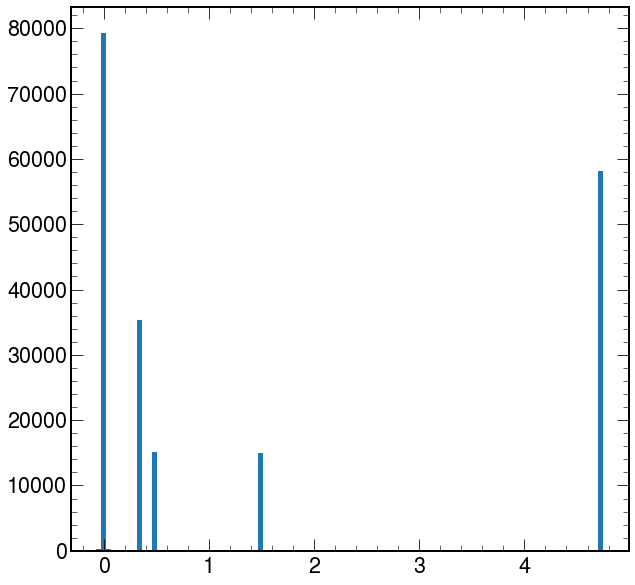

In [173]:
plt.hist(ak.flatten(pp.mass), bins=100)

In [42]:
from numba import njit

@njit
def get_partons_provenance(pdgIds, array_builder):    
    for ids in pdgIds:
        from_part = [-1]*len(ids)
        if len(ids)==7:
            offset = 1
            # the first particle is the additional radiations
            from_part[0] = 4
        else: 
            offset = 0
        # From part ==
        # 1=higgs, 2=hadronic top, 3=leptonic top, 4=additional radiation
    
        top = []
        antitop = []
        hadr_top = 0 # 1==top, -1 antitop
        if ids[0+offset] == 5:
            top.append(0+offset)
        if ids[1+offset] == -5:
            antitop.append(1+offset)
        # Now looking at the top products
        #pair = [ids[2+offset], ids[3+offset]]
        # Antitop
        if ids[2+offset]==3 and ids[3+offset]==-4:
            antitop+= [2+offset, 3+offset]
            hadr_top = -1
        if ids[2+offset]==3 and ids[3+offset]==-2:
            antitop+=[2+offset, 3+offset]
            hadr_top = -1
        if ids[2+offset]==1 and ids[3+offset]==-2:
            antitop+= [2+offset, 3+offset]
            hadr_top = -1
        if ids[2+offset]==1 and ids[3+offset]==-4:
            antitop+= [2+offset, 3+offset]
            hadr_top = -1
        # top
        if ids[2+offset]==-3 and ids[3+offset]==4:
            top+= [2+offset, 3+offset]
            hadr_top = 1
        if ids[2+offset]==-3 and ids[3+offset]==2:
            top+= [2+offset, 3+offset]
            hadr_top = 1
        if ids[2+offset]==-1 and ids[3+offset]==2:
            top+= [2+offset, 3+offset]
            hadr_top = 1
        if ids[2+offset]==-1 and ids[3+offset]==4:
            top+= [2+offset, 3+offset]
            hadr_top = 1

        if hadr_top == -1:
            for i in antitop:
                from_part[i] = 2
            for i in top:
                from_part[i] = 3
        if hadr_top == 1:
            for i in antitop:
                from_part[i] = 3
            for i in top:
                from_part[i] = 2

        # The higgs is at the bottom
        from_part[4+offset] = 1
        from_part[5+offset] = 1
        
        array_builder.begin_list()
        for i in from_part:
            array_builder.append(i)
        array_builder.end_list()
    return array_builder

In [43]:
prov = get_partons_provenance(ak.Array(pp.pdgId, behavior={}), ak.ArrayBuilder()).snapshot()

In [59]:
partons_with_provenance = ak.with_field(pp, prov, "provenance")

In [60]:
partons_with_provenance

<PtEtaPhiMCandidateArray [[{pt: 20.8, ... provenance: 1}]] type='21973 * var * ?...'>

In [44]:
pp.pdgId[0:20].tolist()

[[21, 5, -5, 3, -4, 5, -5],
 [21, 5, -5, 3, -4, 5, -5],
 [21, 5, -5, -3, 4, 5, -5],
 [21, 5, -5, -1, 2, 5, -5],
 [21, 5, -5, 3, -4, 5, -5],
 [2, 5, -5, 3, -4, 5, -5],
 [2, 5, -5, 3, -4, 5, -5],
 [21, 5, -5, -1, 2, 5, -5],
 [-2, 5, -5, -3, 4, 5, -5],
 [21, 5, -5, -3, 4, 5, -5],
 [21, 5, -5, -1, 2, 5, -5],
 [21, 5, -5, 1, -2, 5, -5],
 [21, 5, -5, -1, 2, 5, -5],
 [21, 5, -5, 1, -2, 5, -5],
 [21, 5, -5, 1, -2, 5, -5],
 [21, 5, -5, 3, -4, 5, -5],
 [1, 5, -5, 1, -2, 5, -5],
 [3, 5, -5, -3, 2, 5, -5],
 [21, 5, -5, 1, -2, 5, -5],
 [3, 5, -5, 1, -2, 5, -5]]

In [45]:
hadronictop = pp[prov==4]

In [16]:
hadronictop[0:10].pdgId.tolist()

[[21], [21], [21], [21], [21], [2], [2], [21], [-2], [21]]

In [196]:
ak.sum(sp[prov==2])

5070049.4418029785

(array([5538.,    0.,    0., 5487.,    0.,    0., 5338.,    0.,    0.,
        5607.]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <BarContainer object of 10 artists>)

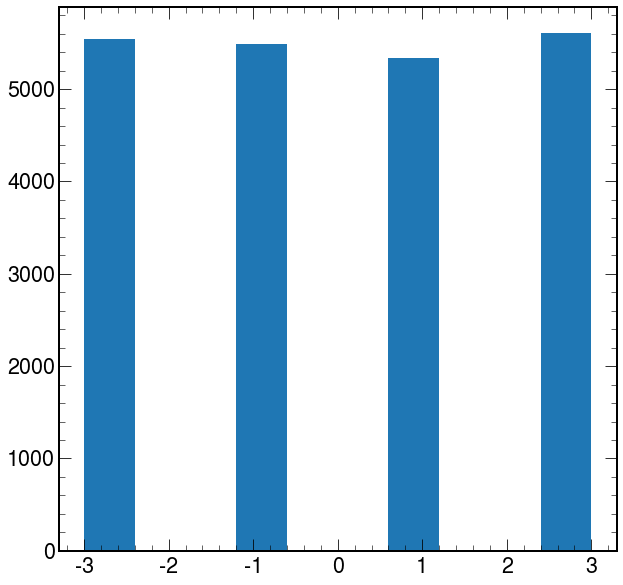

In [151]:
plt.hist(sp.pdgId[:,3])

(array([5588.,    0., 5357.,    0.,    0.,    0.,    0., 5463.,    0.,
        5562.]),
 array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 <BarContainer object of 10 artists>)

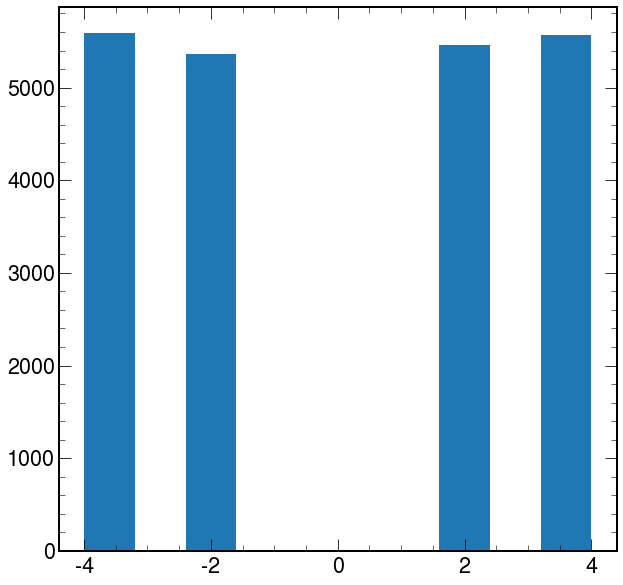

In [152]:
plt.hist(sp.pdgId[:,4ak.num(pp)==7])

In [153]:
sp.pdgId[:,4]

<Array [-4, -4, 4, 2, -4, ... -4, -4, 2, -2, 4] type='21970 * ?int32'>

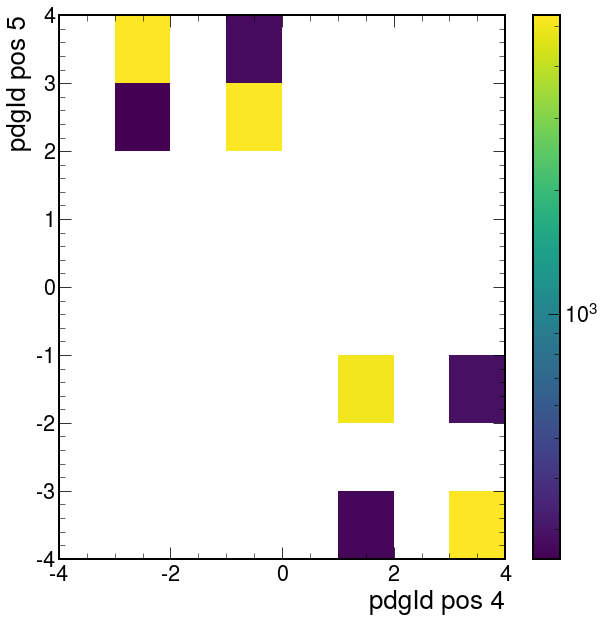

In [150]:
plt.hist2d(ak.to_numpy(sp.pdgId[:,3]),ak.to_numpy(sp.pdgId[:,4]), 
           bins=8, range=((-4, 4),(-4,4)),
          norm=LogNorm())
plt.xlabel("pdgId pos 4")
plt.ylabel("pdgId pos 5")
plt.colorbar()

Matched with quarks

In [61]:
matched_quarks, matched_jets,deltaR_matched,idx_quark, idx_jet, dR = object_matching(partons_with_provenance, events.Jet, dr_min=0.4, return_indices=True)

In [62]:
matched_quarks.pdgId[0:10].tolist()

[[-5, None, None, 5, None, None, None],
 [-5, 5, -5, -4, 3, None, 5, None, None, 21],
 [-3, None, 5, -5, 21, -5, 4, None, None, None, None, None, None],
 [21, 5, 2, -5, -1, None, None, None, None],
 [5, 5, -5, 3, None, None, None, -5, None],
 [-5, None, 5, -5, 2, -4, None, 5, None, None, None],
 [None, 2, -5, 3, -4, 5, None, None],
 [5, -1, -5, 5, None, None, None, None, None],
 [5, 5, 4, None, -3, None, None, None, None, None, -5],
 [-5, 4, 5, 5, -5, None, None, None]]

In [63]:
matched_quarks.provenance[0:10].tolist()

[[1, None, None, 3, None, None, None],
 [2, 3, 1, 2, 2, None, 1, None, None, 4],
 [2, None, 2, 1, 4, 3, 2, None, None, None, None, None, None],
 [4, 2, 2, 1, 2, None, None, None, None],
 [3, 1, 2, 2, None, None, None, 1, None],
 [2, None, 3, 1, 4, 2, None, 1, None, None, None],
 [None, 4, 1, 2, 2, 1, None, None],
 [1, 2, 3, 2, None, None, None, None, None],
 [1, 2, 2, None, 2, None, None, None, None, None, 3],
 [3, 2, 1, 2, 1, None, None, None]]

In [55]:
idx_quark[0:10].tolist()

[[6, 1],
 [2, 1, 6, 4, 3, 5, 0],
 [3, 1, 6, 0, 2, 4],
 [0, 1, 4, 6, 3],
 [1, 5, 2, 3, 6],
 [2, 1, 6, 0, 4, 5],
 [0, 6, 3, 4, 5],
 [5, 3, 2, 1],
 [5, 1, 4, 3, 2],
 [2, 4, 5, 1, 6]]

In [56]:
idx_jet[0:10].tolist()

[[0, 3],
 [0, 1, 2, 3, 4, 6, 9],
 [0, 2, 3, 4, 5, 6],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 7],
 [0, 2, 3, 4, 5, 7],
 [1, 2, 3, 4, 5],
 [0, 1, 2, 3],
 [0, 1, 2, 4, 10],
 [0, 1, 2, 3, 4]]

In [49]:
semilep_partons.pdgId[0:10].tolist()

[[21, 5, -5, -13, 14, 3, -4, 5, -5],
 [21, 5, -5, -15, 16, 3, -4, 5, -5],
 [21, 5, -5, -3, 4, 11, -12, 5, -5],
 [21, 5, -5, -1, 2, 13, -14, 5, -5],
 [21, 5, -5, -15, 16, 3, -4, 5, -5],
 [2, 5, -5, -13, 14, 3, -4, 5, -5],
 [2, 5, -5, -13, 14, 3, -4, 5, -5],
 [21, 5, -5, -1, 2, 15, -16, 5, -5],
 [-2, 5, -5, -3, 4, 13, -14, 5, -5],
 [21, 5, -5, -3, 4, 11, -12, 5, -5]]

In [131]:
idx_quark[0:10].tolist()

[[6, 1],
 [2, 1, 6, 4, 3, 5, 0],
 [3, 1, 6, 0, 2, 4],
 [0, 1, 4, 6, 3],
 [1, 5, 2, 3, 6],
 [2, 1, 6, 0, 4, 5],
 [0, 6, 3, 4, 5],
 [5, 3, 2, 1],
 [5, 1, 4, 3, 2],
 [2, 4, 5, 1, 6]]

In [132]:
idx_jet[0:10].tolist()

[[0, 3],
 [0, 1, 2, 3, 4, 6, 9],
 [0, 2, 3, 4, 5, 6],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 7],
 [0, 2, 3, 4, 5, 7],
 [1, 2, 3, 4, 5],
 [0, 1, 2, 3],
 [0, 1, 2, 4, 10],
 [0, 1, 2, 3, 4]]

In [60]:
matched_jets, matched_quarks,deltaR_matched, idx_jet, idx_quark, dR = object_matching(semilep_events.Jet,semilep_partons, dr_min=0.4, return_indices=True)

In [61]:
matched_quarks.pdgId[0:5].tolist()

[[None, 5, None, -13, None, None, None, None, -5],
 [21, 5, -5, None, None, 3, -4, 5, -5],
 [21, 5, -5, -3, 4, 11, -12, None, -5],
 [21, 5, None, -1, 2, None, None, None, -5],
 [None, 5, -5, -15, None, 3, None, 5, -5]]

In [62]:
ak.num(matched_jets)

<Array [9, 9, 9, 9, 9, 9, ... 9, 9, 9, 9, 9, 9] type='21973 * int64'>

In [53]:
idx_quark[0:5].tolist()

[[1, 3, 8],
 [0, 1, 2, 5, 6, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 8],
 [0, 1, 3, 4, 8],
 [1, 2, 3, 5, 7, 8]]

In [54]:
idx_jet[0:5].tolist()

[[3, 1, 0],
 [9, 1, 0, 4, 3, 6, 2],
 [4, 2, 5, 0, 6, 1, 7, 3],
 [0, 1, 4, 2, 3],
 [0, 2, 8, 3, 1, 7]]

In [176]:
lep_pt = ak.pad_none(events.LeptonGood.pt, 2)

In [183]:
mask = (lep_pt[:,0]>30)& (lep_pt[:,1]>15)

In [186]:
ak.sum(ak.where(ak.is_none(mask), False, mask))

175

In [201]:
lhe_ele = events.LHEPart[(events.LHEPart.status == 1)&(abs(events.LHEPart.pdgId)>=11)&(abs(events.LHEPart.pdgId)>=11)]
pt = ak.fill_none(ak.pad_none(lhe_ele.pt,2),-10)

(array([[1.9348e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.5400e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.8500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00

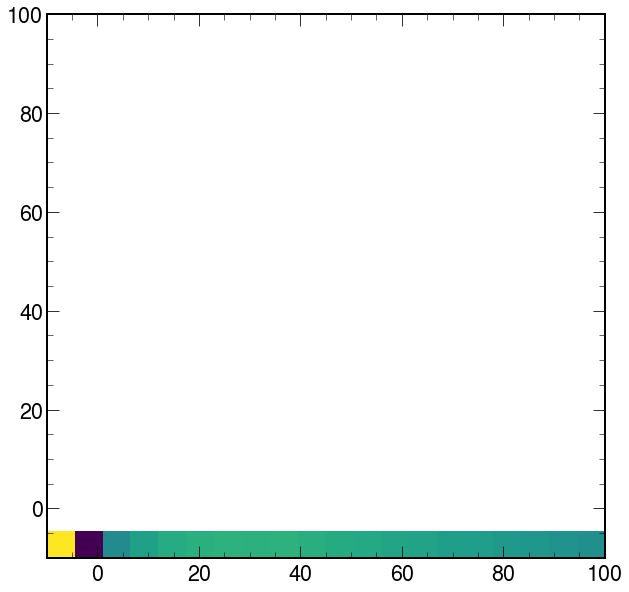

In [204]:
plt.hist2d(ak.to_numpy(pt[:,0]), ak.to_numpy(pt[:,1]), bins=20, range=((-10,100), (-10.,100)), norm=LogNorm())